# Notebook to Ps11 Problem1: Time Delays

© 2024 ETH Zurich, Mark Benazet Castells, Jonas Holinger, Felix Muller, Matteo Penlington; Institute for Dynamic Systems and Control; Prof. Emilio Frazzoli

This interactive notebook is designed to introduce fundamental concepts in control systems engineering. It introduces the Nyquist plot, Nyquist criterion and robustness (gain/phase) margins.

Authors:
- Jonas Holinger; jholinger@ethz.ch
- Shubham Gupta; shugupta@ethz.ch

In [1]:
# import libraries

%pip install numpy matplotlib scipy ipywidgets control IPython sympy

import control as ct
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import ipywidgets as widgets
from IPython.display import display, clear_output, Math
from ipywidgets import interact
import warnings
warnings.filterwarnings('ignore')


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



### Problem 1.1 a): Bode plots with and without time delay



 The code Below plots the Bode Plot of the open loop Transfer function without time delay $L(s)$ compared to the same transfer function with a time delay $\tilde L (s)$.

 $ L(s)=\frac{2}{s(s^2+4s+2)} $
 
 $ \tilde L (s)= e^{-s} \frac{2}{s(s^2+4s+2)}$
 

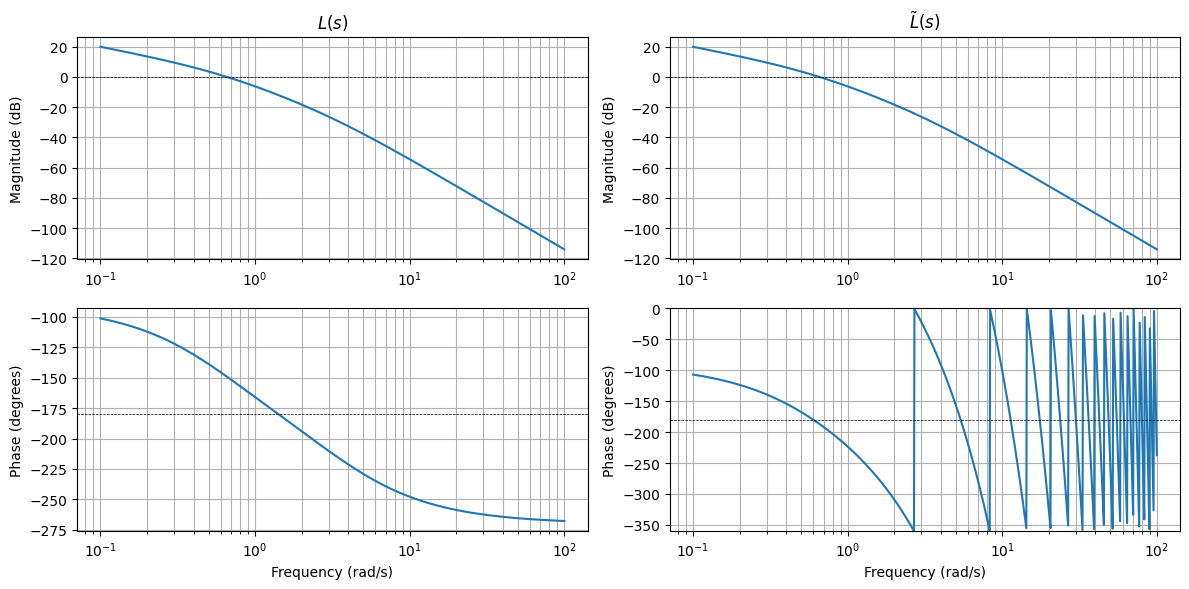

In [2]:


s = ct.TransferFunction.s

L = ct.tf(2 / (s * (s**2 + 4*s + 2)))


#GM_L, PM_L, wgc_L, wpc_L = margin(L)

# Bode plot for L(s)

mag, phase, omega = ct.bode_plot(L, dB=True, deg=True, plot=False)
mag = 20 * np.log10(mag)
phase = np.degrees(phase)

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.semilogx(omega, mag, label='Magnitude (dB)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

plt.ylabel('Magnitude (dB)')
plt.grid(True, which="both")
plt.title('$L(s)$')

plt.subplot(2, 2, 3)
plt.semilogx(omega, phase)
plt.axhline(-180, color='black', linewidth=0.5, linestyle='--')

plt.ylabel('Phase (degrees)')
plt.xlabel('Frequency (rad/s)')
plt.grid(True, which="both")


mag, phase, omega = ct.bode_plot(L, dB=True, deg=True, plot=False)
mag = 20 * np.log10(mag)
phase = np.degrees(phase-omega)
phase = phase%(-360)

plt.subplot(2, 2, 2)
plt.semilogx(omega, mag)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

plt.ylabel('Magnitude (dB)')
plt.grid(True, which="both")
plt.title('$\~L(s)$')

plt.subplot(2, 2, 4)
plt.semilogx(omega, phase)
plt.axhline(-180, color='black', linewidth=0.5, linestyle='--')

plt.ylabel('Phase (degrees)')
plt.xlabel('Frequency (rad/s)')
plt.grid(True, which="both")

plt.ylim([-360,0])

plt.tight_layout()
plt.show()


### Problem 1.1 b), 1.2 b): Nyquist analysis




The following Plot Visualizes the Nyquist plot of $\tilde L (s)$.


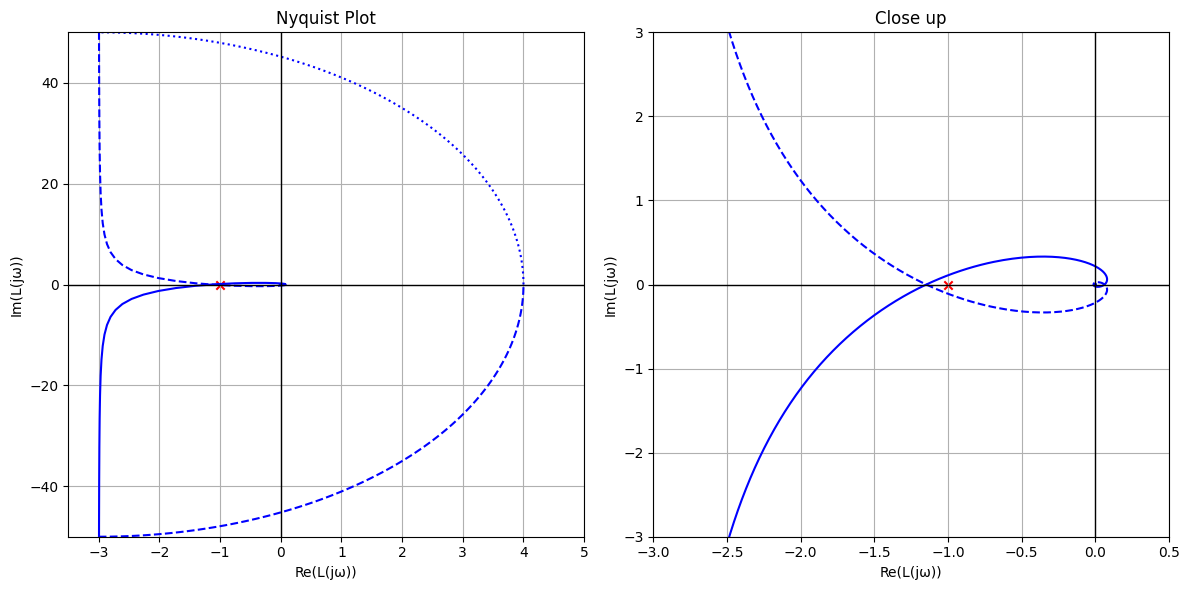

In [3]:
s = ct.TransferFunction.s
L = ct.tf(2 / (s * (s**2 + 4*s + 2)))
omega = np.logspace(-2,2)

mag, phase, omega = ct.bode_plot(L, omega, dB=True, deg=True, plot=False)
phase = phase-omega
G = mag * np.exp(1j * (phase))


plt.figure(figsize=(12,6))

# First subplot (left side)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(G.real, G.imag, color='blue')
plt.plot(G.real, -G.imag, color='blue', linestyle='dashed')

ylim = 50
xlim1 = -3.5
xlim2 = 5

plt.scatter([-1], [0], color='red', marker='x')
theta = np.linspace(-np.pi/2, 0, 100) 
half_circle_real1 = (xlim2+2)*np.cos(theta)  
half_circle_imag1 = ylim*np.sin(theta)
plt.plot(half_circle_real1-3, half_circle_imag1, color='blue',linestyle='dashed')
theta2 = np.linspace(0, np.pi/2, 100)  
half_circle_real2 = (xlim2+2)*np.cos(theta2)  
half_circle_imag2 = ylim*np.sin(theta2)
plt.plot(half_circle_real2-3, half_circle_imag2, color='blue',linestyle='dotted')


plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.title('Nyquist Plot')
plt.xlabel('Re(L(jω))')
plt.ylabel('Im(L(jω))')
plt.ylim([-ylim,ylim])
plt.xlim([xlim1, xlim2])
plt.grid(True)



plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
omega = np.logspace(-1, 2, 500)
mag, phase, omega = ct.bode_plot(L, omega, dB=True, deg=True, plot=False)
phase = phase-omega
G = mag * np.exp(1j * (phase))
plt.plot(G.real, G.imag, color='blue')
plt.plot(G.real, -G.imag, color='blue', linestyle='dashed')


plt.scatter([-1], [0], color='red', marker='x')


plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.title('Close up')
plt.xlabel('Re(L(jω))')
plt.ylabel('Im(L(jω))')
plt.ylim([-3,3])
plt.xlim([-3, 0.5])
plt.grid(True)

plt.tight_layout()
plt.show()



### Problem 1.2 a): Root locus

Taking The Padé approximation of the time delay we get:

$T_d = \frac{2-s}{2+s}$

$\~L_p(s) = T_d*L(s) = \frac{2-s}{2+s} * \frac{2}{s(s^2+4s+2)}$

The following Code draws the root locus of $\~L_p(s)$

In [4]:
s = ct.TransferFunction.s
def Root_locus(k):
    T_d = ct.tf((2-s)/(2+s))
    L = ct.tf(2 / (s * (s**2 + 4*s + 2)))
    L_p = T_d * L

    T = 1/(1+k*L_p)

    k_range = np.arange(0, 200, 0.01)

    closed_loop_poles = ct.poles(T)
    plt.figure(figsize=(8,6))
    ct.rlocus(L_p, gains=k_range, grid=False, title= '')
    plt.plot(closed_loop_poles.real, closed_loop_poles.imag, 'rx', markersize=10)
    plt.xlabel('Re(s)')
    plt.ylabel('Im(s)')
    plt.grid(False)
    plt.axhline(0, color='black',linewidth=1)
    plt.axvline(0, color='black',linewidth=1)
    plt.tight_layout()
    plt.show()
k_slider_cl = widgets.FloatSlider(
    value=1.0,        # Initial value of k
    min=-1.0,        
    max=2.0,        
    step=0.05,         # Step size for k
    description='k:', 
    continuous_update=True ,
    layout=widgets.Layout(width='1000px')
)

output = widgets.interactive_output(Root_locus, {'k': k_slider_cl})
display(k_slider_cl, output)

FloatSlider(value=1.0, description='k:', layout=Layout(width='1000px'), max=2.0, min=-1.0, step=0.05)

Output()

### Problem 1.2 b),c): Bode plot with proportional gain

The following code takes the silder input as the proportional gain $k$ and displays the Bode plots of
$k*\~L(s)$

In [5]:
s = ct.TransferFunction.s
def Bode_plot_with_gain(k):
    L = ct.tf(2*k / (s * (s**2 + 4*s + 2)))


    #GM_L, PM_L, wgc_L, wpc_L = margin(L)

    # Bode plot for L(s)

    mag, phase, omega = ct.bode_plot(L, dB=True, deg=True, plot=False)
    mag = 20 * np.log10(mag)
    phase = np.degrees(phase)

    plt.figure(figsize=(12, 6))



    gm, pm, wcg, wcp = ct.margin(L)

    mag, phase, omega = ct.bode_plot(L, dB=True, deg=True, plot=False)
    mag = 20 * np.log10(mag)
    phase = np.degrees(phase-omega)
    phase = phase%(-360)
    print(wcp)

    plt.subplot(2, 1, 1)
    plt.semilogx(omega, mag)
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

    plt.ylabel('Magnitude (dB)')
    plt.grid(True, which="both")
    plt.title('$k*\~L(s)$')

    plt.subplot(2, 1, 2)
    plt.semilogx(omega, phase)
    plt.axhline(-180, color='black', linewidth=0.5, linestyle='--')

    plt.ylabel('Phase (degrees)')
    plt.xlabel('Frequency (rad/s)')
    plt.grid(True, which="both")

    plt.ylim([-360,0])

    plt.tight_layout()
    plt.show()
    

k_slider_cl = widgets.FloatSlider(
    value=1.0,        # Initial value of k
    min=-10.0,       
    max=10.0,        
    step=0.1,         
    description='k:', 
    continuous_update=True , 
    layout=widgets.Layout(width='1000px')
)

output = widgets.interactive_output(Bode_plot_with_gain, {'k': k_slider_cl})

display(k_slider_cl, output)

FloatSlider(value=1.0, description='k:', layout=Layout(width='1000px'), max=10.0, min=-10.0)

Output()

### Problem 1.2 b): Step response

The following snippet displays the step response to

$\~T(s) = \frac{k \cdot \~L(s)}{1 + k \cdot \~L(s) }$

In [9]:

s = ct.TransferFunction.s
def step_resp(k):
    Td = 1  

    L = ct.tf(2/ (s * (s**2 + 4*s + 2)))
    Lk = k*L

    pade_num, pade_den = ct.pade(Td, 7)  
    Delay = ct.tf(pade_num, pade_den)




    L_tilde= ct.series(Delay, Lk)
    T_tilde = L_tilde/(1+L_tilde)
 
    t = np.linspace(0, 35, 1000)
    T = Lk/(1+Lk)

    time, response = ct.step_response(T_tilde, T=t)

    plt.figure()
    plt.plot(time, response)
    plt.title("Step Response of Time-Delayed System")
    plt.xlabel("Time (s)")
    plt.ylabel("Response")
    plt.grid()
    plt.show()
k_slider_cl = widgets.FloatSlider(
    value=1.0,        # Initial value of k
    min=-10.0,       
    max=10.0,        
    step=0.05,         
    description='k:', 
    continuous_update=True , 
    layout=widgets.Layout(width='1000px')
)

output = widgets.interactive_output(step_resp, {'k': k_slider_cl})

display(k_slider_cl, output)


FloatSlider(value=1.0, description='k:', layout=Layout(width='1000px'), max=10.0, min=-10.0, step=0.05)

Output()

### Problem 1.3 a): Compensator

Provided below is the bode plot $k\cdot C \cdot \~L(s)$ with an interactive compensator C of the form

$C = \frac{s+a}{s+b}$

Below the plot you can find the values for the Gain margin and Phase margin as well as the gain crossover frequency and phase crossover frequency.

Note: k is set to the default value of 0.1, if you got another value please change it directly in the indicated place inside the definition of Bode_plot_compensator.

If you didn't get a value for k in the Task 2 c), use the default of 0.1.

In [7]:
s = ct.TransferFunction.s
def Bode_plot_compensator(a ,b):

    k = 0.1 #proportional gain k please change to your value 

    L = ct.tf(2*k / (s * (s**2 + 4*s + 2)))
    C = ct.tf((s+a)/(s+b))
    L_tot = C * L


    #GM_L, PM_L, wgc_L, wpc_L = margin(L)

    # Bode plot for L(s)

    mag, phase, omega = ct.bode_plot(L, dB=True, deg=True, plot=False)
    mag = 20 * np.log10(mag)
    phase = np.degrees(phase)

    

   

    mag, phase, omega = ct.bode_plot(L_tot, dB=True, deg=True, plot=False)
    mag = 20 * np.log10(mag)
    phase = np.degrees(phase-omega)
    phase = phase%(-360)

    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.semilogx(omega, mag)
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

    plt.ylabel('Magnitude (dB)')
    plt.grid(True, which="both")
    plt.title(f'$k \\cdot C \\cdot \\tilde{{L}}(s)$, with $C = \\frac{{s+a}}{{s+b}}$')

    plt.subplot(2, 1, 2)
    plt.semilogx(omega, phase)
    plt.axhline(-180, color='black', linewidth=0.5, linestyle='--')

    plt.ylabel('Phase (degrees)')
    plt.xlabel('Frequency (rad/s)')
    plt.grid(True, which="both")

    plt.ylim([-360,0])

    gm, pm, wcg, wcp = ct.margin(L_tot)
    
    
    plt.tight_layout()
    plt.show()
    '''
    print("Gain Margin (dB):", 20 * np.log10(gm) if gm > 0 else 'Infinity')
    print("Phase Margin (degrees):", pm)
    print("Gain Crossover Frequency (rad/s):", wcp)
    print("Phase Crossover Frequency (rad/s):", wcg)
    '''
    
'''
k_slider_cl = widgets.FloatSlider(
    value=0.1,        # Initial value of k
    min=-10.0,        # Minimum value of k
    max=10.0,        # Maximum value of k
    step=0.1,         # Step size for k
    description='k:', # Label for the slider
    continuous_update=True , # Update the plot in real-time as the slider moves
    layout=widgets.Layout(width='1000px')
)
'''
a_slider_cl = widgets.FloatSlider(
    value=1.0,        # Initial value of k
    min=-0,        
    max=2.0,       
    step=0.01,         
    description='a:', 
    continuous_update=True , 
    layout=widgets.Layout(width='1000px')
)
b_slider_cl = widgets.FloatSlider(
    value=1.0,        # Initial value of k
    min=0,        
    max=2.0,        
    step=0.01,         
    description='b:',
    continuous_update=True , 
    layout=widgets.Layout(width='1000px')
)
#'k': k_slider_cl,
output = widgets.interactive_output(Bode_plot_compensator, {"a": a_slider_cl, "b": b_slider_cl})
#k_slider_cl,
display(a_slider_cl, b_slider_cl, output)

FloatSlider(value=1.0, description='a:', layout=Layout(width='1000px'), max=2.0, step=0.01)

FloatSlider(value=1.0, description='b:', layout=Layout(width='1000px'), max=2.0, step=0.01)

Output()

### Problem 1.3 b): Compensator v2

Provided below is the bode plot $k\cdot C_{lag} \cdot C_{lead} \cdot \~L(s)$ with an interactive compensators $C_{lag}$ and $C_{lead}$ of the form

 $C = \frac{s+a}{s+b}$

k is set to the default value of 0.1, again if you got another value please change it directly in the indicated place inside the definition of Bode_plot_compensator.

Note: If you didn't get a value for k in the Task 2 c), use the default of 0.1.

In [8]:
s = ct.TransferFunction.s
def Bode_plot_compensator(a_lag,b_lag,a_lead,b_lead):

    k = 0.1

    L = ct.tf(2*k / (s * (s**2 + 4*s + 2)))
    C_lag = ct.tf((s+a_lag)/(s+b_lag))
    C_lead = ct.tf((s+a_lead)/(s+b_lead))
    L_tot = C_lag * C_lead * L


    #GM_L, PM_L, wgc_L, wpc_L = margin(L)

    # Bode plot for L(s)

    mag, phase, omega = ct.bode_plot(L, dB=True, deg=True, plot=False)
    mag = 20 * np.log10(mag)
    phase = np.degrees(phase)

    

   

    mag, phase, omega = ct.bode_plot(L_tot, dB=True, deg=True, plot=False)
    mag = 20 * np.log10(mag)
    phase = np.degrees(phase-omega)
    phase = phase%(-360)

    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    plt.semilogx(omega, mag)
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

    plt.ylabel('Magnitude (dB)')
    plt.grid(True, which="both")
    plt.title(f'$k \\cdot C_{{lag}} \\cdot C_{{lead}} \\cdot \\tilde{{L}}(s)$, with $C_{{lag}} = \\frac{{s+a_{{lag}}}}{{s+b_{{lag}}}}$ and $C_{{lead}} = \\frac{{s+a_{{lead}}}}{{s+b_{{lead}}}}$')

    plt.subplot(2, 1, 2)
    plt.semilogx(omega, phase)
    plt.axhline(-180, color='black', linewidth=0.5, linestyle='--')

    plt.ylabel('Phase (degrees)')
    plt.xlabel('Frequency (rad/s)')
    plt.grid(True, which="both")

    plt.ylim([-360,0])

    
    plt.tight_layout()
    plt.show()

    gm, pm, wcg, wcp = ct.margin(L_tot)
    


a_slider_cl = widgets.FloatSlider(
    value=0.2,        # Initial value of a_lag
    min=0,        
    max=2.0,        
    step=0.01,         
    description='a_lag:', 
    continuous_update=True , 
    layout=widgets.Layout(width='1000px')
)
b_slider_cl = widgets.FloatSlider(
    value=0.02,        # Initial value of b_lag
    min=0, 
    max=2.0,        
    step=0.01,         
    description='b_lag:', 
    continuous_update=True , 
    layout=widgets.Layout(width='1000px')
)
a_l_slider_cl = widgets.FloatSlider(
    value=1.0,        # Initial value of a_lead
    min=0,        
    max=2.0,       
    step=0.01,         
    description='a_lead:', 
    continuous_update=True ,
    layout=widgets.Layout(width='1000px')
)
b_l_slider_cl = widgets.FloatSlider(
    value=1.0,        # Initial value of b_lead
    min=0,        
    max=2.0,        
    step=0.01,         
    description='b_lead:', 
    continuous_update=True , 
    layout=widgets.Layout(width='1000px')
)

output = widgets.interactive_output(Bode_plot_compensator, { 'a_lag': a_slider_cl, 'b_lag': b_slider_cl, 'a_lead': a_l_slider_cl, 'b_lead': b_l_slider_cl})

display(a_slider_cl, b_slider_cl,a_l_slider_cl,b_l_slider_cl, output)

FloatSlider(value=0.2, description='a_lag:', layout=Layout(width='1000px'), max=2.0, step=0.01)

FloatSlider(value=0.02, description='b_lag:', layout=Layout(width='1000px'), max=2.0, step=0.01)

FloatSlider(value=1.0, description='a_lead:', layout=Layout(width='1000px'), max=2.0, step=0.01)

FloatSlider(value=1.0, description='b_lead:', layout=Layout(width='1000px'), max=2.0, step=0.01)

Output()